In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_parquet("../data/processed/housing_residential_processed.parquet").copy()

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [10]:
df['year'] = df['date'].dt.year

In [11]:
df_counts = df.groupby(['year', 'market_type']).size().reset_index(name='count')

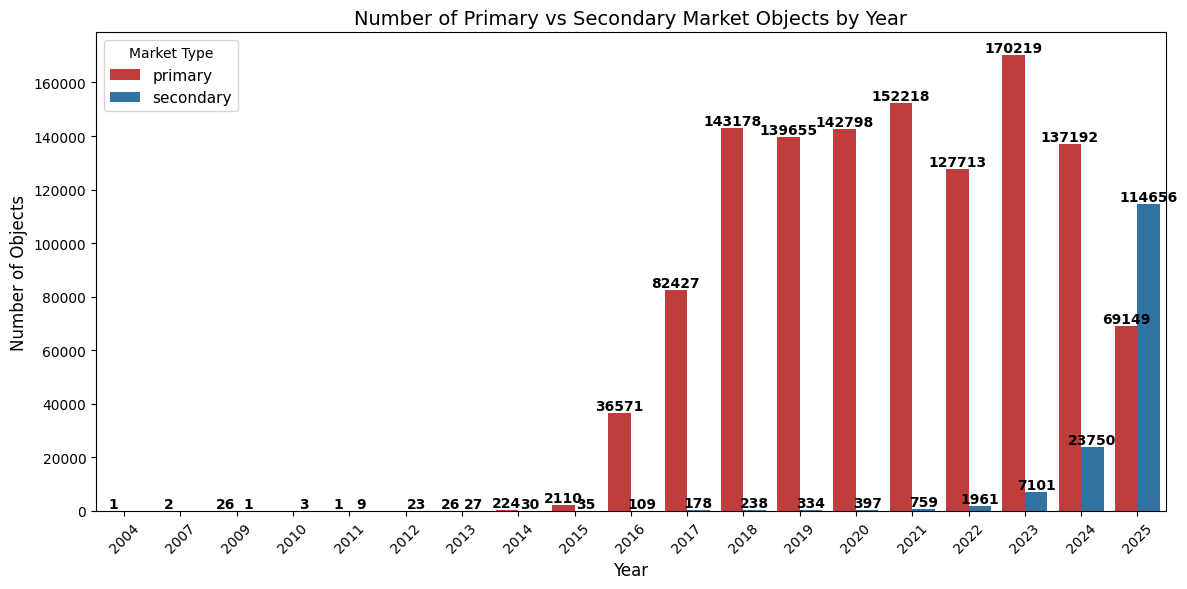

In [16]:
# Plot bar chart
plt.figure(figsize=(12,6))
barplot = sns.barplot(
    data=df_counts, 
    x='year', 
    y='count', 
    hue='market_type',
    palette={'primary': '#d62728', 'secondary': '#1f77b4'}  # red for primary, blue for secondary
)

# Annotate bars with counts
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=10, fontweight='bold'
        )

plt.title("Number of Primary vs Secondary Market Objects by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Objects", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Market Type', fontsize=11)
plt.tight_layout()
plt.show()


In [19]:
df = pd.read_parquet("../data/processed/housing_residential_processed.parquet").copy()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2023) & (df['year'] <= 2025)]

# ---------------------------
# 2️⃣ Фильтруем по рынкам
# ---------------------------
df_primary = df[df['market_type'] == 'primary']
df_secondary = df[df['market_type'] == 'secondary']

# ---------------------------
# 3️⃣ Группировка по годам
# ---------------------------
# Средняя цена
avg_price_primary = df_primary.groupby('year')['price_per_square_meter'].mean().reset_index()
avg_price_primary.rename(columns={'price_per_square_meter': 'avg_price_primary'}, inplace=True)

avg_price_secondary = df_secondary.groupby('year')['price_per_square_meter'].mean().reset_index()
avg_price_secondary.rename(columns={'price_per_square_meter': 'avg_price_secondary'}, inplace=True)

# Количество объектов
count_primary = df_primary.groupby('year').size().reset_index(name='count_primary')
count_secondary = df_secondary.groupby('year').size().reset_index(name='count_secondary')

# ---------------------------
# 4️⃣ Объединяем все метрики
# ---------------------------
df_agg = avg_price_primary.merge(avg_price_secondary, on='year', how='outer')
df_agg = df_agg.merge(count_primary, on='year', how='outer')
df_agg = df_agg.merge(count_secondary, on='year', how='outer')

df_agg = df_agg.sort_values('year').reset_index(drop=True)
print("Aggregated data:")
print(df_agg)

# ---------------------------
# 5️⃣ Корреляции
# ---------------------------
# Корреляция средних цен
price_corr_pearson = df_agg[['avg_price_primary','avg_price_secondary']].corr(method='pearson')
price_corr_spearman = df_agg[['avg_price_primary','avg_price_secondary']].corr(method='spearman')

# Корреляция количества объектов
count_corr_pearson = df_agg[['count_primary','count_secondary']].corr(method='pearson')
count_corr_spearman = df_agg[['count_primary','count_secondary']].corr(method='spearman')

print("\nCorrelation of average prices:")
print(price_corr_pearson)
print("\nSpearman correlation of average prices:")
print(price_corr_spearman)

print("\nCorrelation of counts:")
print(count_corr_pearson)
print("\nSpearman correlation of counts:")
print(count_corr_spearman)


Aggregated data:
   year  avg_price_primary  avg_price_secondary  count_primary  \
0  2023      277617.950641        144536.635840         170219   
1  2024      325384.772412        178379.084189         137192   
2  2025      329815.988467        224018.190613          69149   

   count_secondary  
0             7101  
1            23750  
2           114656  

Correlation of average prices:
                     avg_price_primary  avg_price_secondary
avg_price_primary             1.000000             0.861565
avg_price_secondary           0.861565             1.000000

Spearman correlation of average prices:
                     avg_price_primary  avg_price_secondary
avg_price_primary                  1.0                  1.0
avg_price_secondary                1.0                  1.0

Correlation of counts:
                 count_primary  count_secondary
count_primary         1.000000        -0.983504
count_secondary      -0.983504         1.000000

Spearman correlation of counts:
